In [1]:
#https://www.kaggle.com/tolgadincer/continuous-target-stratification
import re
import os
import numpy as np
import pandas as pd
import random
import math
import tensorflow as tf
import tensorflow_addons as tfa
import logging
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras import backend as K
from transformers import RobertaTokenizer, TFRobertaModel
from kaggle_datasets import KaggleDatasets
tf.get_logger().setLevel(logging.ERROR)
from kaggle_datasets import KaggleDatasets

In [2]:
# Configurations
EPOCHS = 75#100#30#10#70#150
# Batch size
BATCH_SIZE = 16#512#16#24
# Seed
SEED = 123
# Learning rate
LR = 2e-5#1e-3#2e-5 #0.000040
# Weight decay
WD = LR/(EPOCHS)
epsilon=1e-6

# Verbosity
VERBOSE = 2
# Number of folds for training
FOLDS = 5
#groups
n_grp=len(pd.read_csv('../input/commonlitreadabilityprize/train.csv'))
print('number of group',n_grp)
path_aug = '../input/commonlitreadabilityprize/train.csv'#'../input/data-aug-commonlit-readability-lang-translation/augmented_data.csv'
# Max length
MAX_LEN = 256 #300#250
Freeze_layers = 0

# Get the trained model we want to use
MODEL = 'roberta-base'

# Let's load our model tokenizer
tokenizer = RobertaTokenizer.from_pretrained(MODEL)

# For tf.dataset
AUTO = tf.data.experimental.AUTOTUNE

number of group 2834


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [3]:
# def create_folds(df, n_s=5, n_grp=None):
#     df['Fold'] = -1
    
#     if n_grp is None:
#         skf = KFold(n_splits=n_s)
#         target = df.target
#     else:
#         skf = StratifiedKFold(n_splits=n_s)
#         df['grp'] = pd.cut(df.target, n_grp, labels=False)
#         target = df.grp
    
#     for fold_no, (t, v) in enumerate(skf.split(target, target)):
#         df.loc[v, 'Fold'] = fold_no
#     return df

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)




--------------------------------------------------
Training fold 1


Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 124,842,753
Trainable params: 124,842,753
Non-trainable params: 0
_________________________________________________________________
None
Model: "model"
_________________________________________________________________
Layer (type)               

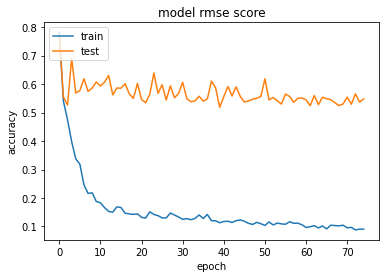

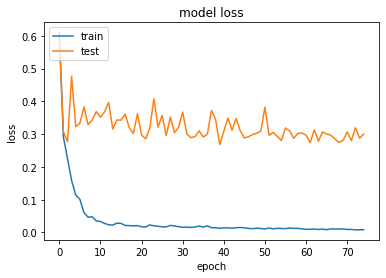



--------------------------------------------------
Training fold 2


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 124,842,753
Trainable params: 124,842,753
Non-trainable params: 0
_________________________________________________________________
None
Model: "model"
_________________________________________________________________
Layer (type)               

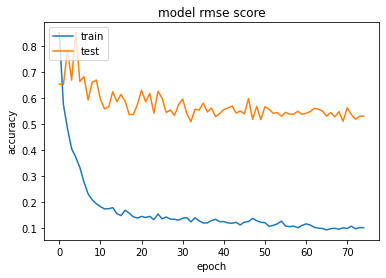

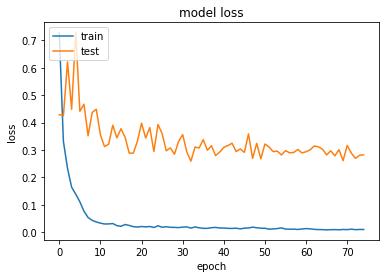



--------------------------------------------------
Training fold 3


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 124,842,753
Trainable params: 124,842,753
Non-trainable params: 0
_________________________________________________________________
None
Model: "model"
_________________________________________________________________
Layer (type)               

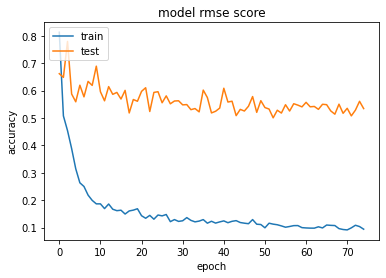

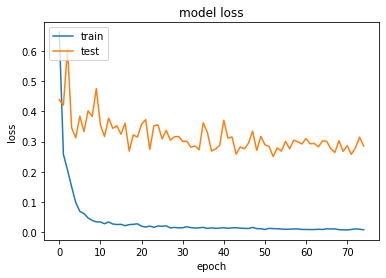



--------------------------------------------------
Training fold 4


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 124,842,753
Trainable params: 124,842,753
Non-trainable params: 0
_________________________________________________________________
None
Model: "model"
_________________________________________________________________
Layer (type)               

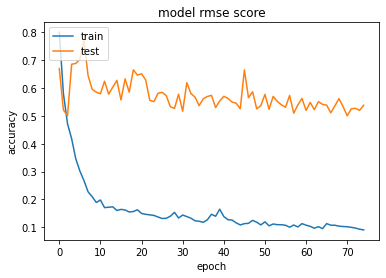

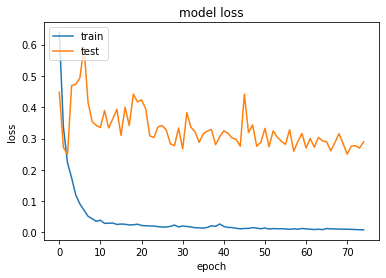



--------------------------------------------------
Training fold 5


Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 256)]             0         
_________________________________________________________________
tf_roberta_model (TFRobertaM TFBaseModelOutputWithPool 124645632 
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               196864    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 124,842,753
Trainable params: 124,842,753
Non-trainable params: 0
_________________________________________________________________
None
Model: "model"
_________________________________________________________________
Layer (type)               

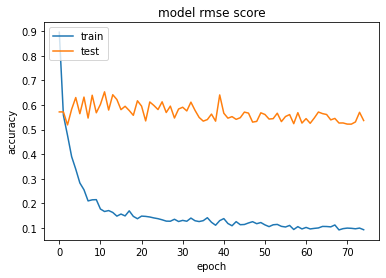

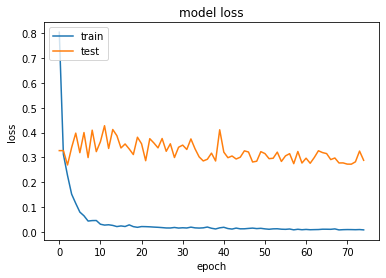



--------------------------------------------------
Our out of folds RMSE is 0.5095172067147273


In [4]:
# Function to seed everything
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

# This function tokenize the text according to a transformers model tokenizer
def regular_encode(texts, tokenizer, maxlen = MAX_LEN):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        padding = 'max_length',
        truncation = True,
        max_length = maxlen,
    )
    
    return np.array(enc_di['input_ids'])

# This function encode our training sentences
def encode_texts(x_train, x_val, MAX_LEN):
    x_train = regular_encode(x_train.tolist(), tokenizer, maxlen = MAX_LEN)
    x_val = regular_encode(x_val.tolist(), tokenizer, maxlen = MAX_LEN)
    return x_train, x_val

# Function to transform arrays to tensors
def transform_to_tensors(x_train, x_val, y_train, y_val):
    
    train_dataset = (
        tf.data.Dataset
        .from_tensor_slices((x_train, y_train))
        .repeat()
        .shuffle(2048)
        .batch(BATCH_SIZE)
        .prefetch(AUTO)
    )
    
    valid_dataset = (
        tf.data.Dataset
        .from_tensor_slices((x_val, y_val))
        .batch(BATCH_SIZE)
        .prefetch(AUTO)
    )
    
    return train_dataset, valid_dataset

# Function to build our model
def build_roberta_base_model(max_len = MAX_LEN):
    transformer = TFRobertaModel.from_pretrained(MODEL)
    input_word_ids = tf.keras.layers.Input(shape = (max_len, ), dtype = tf.int32, name = 'input_word_ids')
    sequence_output = transformer(input_word_ids)[0]
    # We only need the cls_token, resulting in a 2d array
    cls_token = sequence_output[:, 0, :]
#     cls_token = sequence_output
#     x= tf.keras.layers.LSTM(768, dropout=0.0, recurrent_dropout=0.0)(cls_token)
    x = tf.keras.layers.Dense(256, activation = 'gelu', dtype = 'float32')(cls_token)
#     x = tf.keras.layers.Dropout(0.2)(x)
#     x = tf.keras.layers.Dense(256, activation = 'relu', dtype = 'float32')(x)
#     x = tf.keras.layers.Dropout(0.2)(x)
    output = tf.keras.layers.Dense(1, activation = 'linear', dtype = 'float32')(x)
    model = tf.keras.models.Model(inputs = [input_word_ids], outputs = [output])
    print(model.summary())
    for layer in model.layers[:Freeze_layers]:
        print('Freezed layer',layer)
        layer.trainable = False
    print(model.summary())
    model.compile(#optimizer = tf.keras.optimizers.Adam(lr = LR),#tfa.optimizers.AdamW(learning_rate = LR),#tf.keras.optimizers.Adam(lr = LR),
        optimizer = tfa.optimizers.AdamW(learning_rate = LR, weight_decay=WD, epsilon= epsilon),          
        loss = [tf.keras.losses.MeanSquaredError()],
                  metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model

# Function to train and evaluate our model
def train_and_evaluate():
    
    # Read our training data
    df = pd.read_csv(path_aug)
#     df['target'] = df['final_target']
#     df['excerpt'] = df['final_excerpt']
    # Seed everything
    seed_everything(SEED)
    
    # Initiate kfold object with shuffle and a specific seed
#     kfold = KFold(n_splits = FOLDS, shuffle = True, random_state = SEED)
    kfold = StratifiedKFold(n_splits=FOLDS, shuffle = True, random_state = SEED)
    df['grp'] = pd.cut(df.target, n_grp, labels=False)
    target = df.grp
    # Create out of folds array to store predictions
    oof_predictions = np.zeros(len(df))
    
    for fold, (trn_ind, val_ind) in enumerate(kfold.split(df,target)):
        print('\n')
        print('-'*50)
        print(f'Training fold {fold + 1}')
        K.clear_session()
        # Get text features and target
        x_train, x_val = df['excerpt'].iloc[trn_ind], df['excerpt'].iloc[val_ind]
        y_train, y_val = df['target'].iloc[trn_ind].values, df['target'].iloc[val_ind].values
        # Encode our text with Roberta tokenizer
        x_train, x_val = encode_texts(x_train, x_val, MAX_LEN)
        # Function to transform our numpy array to a tf Dataset
        train_dataset, valid_dataset = transform_to_tensors(x_train, x_val, y_train, y_val)
        # Build model
        model = build_roberta_base_model(max_len = MAX_LEN)
        # Model checkpoint
        checkpoint = tf.keras.callbacks.ModelCheckpoint(f'Roberta_Base_{SEED}_{fold + 1}.h5', 
                                                        monitor = 'val_root_mean_squared_error', 
                                                        verbose = VERBOSE, 
                                                        save_best_only = True,
                                                        save_weights_only = True, 
                                                        mode = 'min')
        steps = x_train.shape[0] // (BATCH_SIZE)
        # Training phase
        history = model.fit(train_dataset,
                            batch_size = BATCH_SIZE,
                            epochs = EPOCHS,
                            verbose = VERBOSE,
                            callbacks = [checkpoint],
                            validation_data = valid_dataset,
                            steps_per_epoch = steps)
        
        # summarize history for accuracy
        plt.plot(history.history['root_mean_squared_error'])
        plt.plot(history.history['val_root_mean_squared_error'])
        plt.title('model rmse score')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        # Load best epoch weights
        model.load_weights(f'Roberta_Base_{SEED}_{fold + 1}.h5')
        # Predict validation set to save them in the out of folds array
        val_pred = model.predict(valid_dataset)
        oof_predictions[val_ind] = val_pred.reshape(-1)
        
    print('\n')
    print('-'*50)
    # Calculate out of folds root mean squared error
    oof_rmse = np.sqrt(mean_squared_error(df['target'], oof_predictions))
    print(f'Our out of folds RMSE is {oof_rmse}')
    

train_and_evaluate()

# checking to freeze some layer to non trainable

In [5]:
#  #Function to build our model
# def build_roberta_base_model(max_len = MAX_LEN):
#     transformer = TFRobertaModel.from_pretrained(MODEL)
#     input_word_ids = tf.keras.layers.Input(shape = (max_len, ), dtype = tf.int32, name = 'input_word_ids')
#     sequence_output = transformer(input_word_ids)[0]
#     # We only need the cls_token, resulting in a 2d array
#     cls_token = sequence_output[:, 0, :]
#     output = tf.keras.layers.Dense(1, activation = 'linear', dtype = 'float32')(cls_token)
#     model = tf.keras.models.Model(inputs = [input_word_ids], outputs = [output])
# #     model.compile(#optimizer = tf.keras.optimizers.Adam(lr = LR),#tfa.optimizers.AdamW(learning_rate = LR),#tf.keras.optimizers.Adam(lr = LR),
# #         optimizer = tfa.optimizers.AdamW(learning_rate = LR, weight_decay=WD, epsilon= epsilon),          
# #         loss = [tf.keras.losses.MeanSquaredError()],
# #                   metrics = [tf.keras.metrics.RootMeanSquaredError()])
#     return model
# model = build_roberta_base_model(max_len = MAX_LEN)

In [6]:
# # Print current trainable map:
# print(model._get_trainable_state())

In [7]:
# model.summary()

In [8]:
# # last_few_layers =
# for layer in model.layers[:2]:
#     print(layer)
#     layer.trainable = False

In [9]:
# model.summary()

In [10]:
# tf.keras.utils.plot_model(model)
